# **Let's Try DDNM!**

Zero Shot Image Restoration Using Denoising Diffusion Null-Space Model

[Yinhuai Wang](https://wyhuai.github.io/info/)\*, Jiwen Yu\*, Jian Zhang

[Paper](https://arxiv.org/pdf/2212.00490.pdf) | [Project](https://wyhuai.github.io/ddnm.io/) | [Github](https://github.com/wyhuai/DDNM)

If you find this work useful, please consider citing:


```
@article{wang2022ddnm,
title={Zero Shot Image Restoration Using Denoising Diffusion Null-Space Model},
author={Yinhuai, Wang and Jiwen, Yu and Jian, Zhang},
journal={ICLR},
year={2023}}
}
```



# **Preparation**

This colab demo is based on [RePaint](https://github.com/andreas128/RePaint).

Check the GPU

In [1]:
!/opt/bin/nvidia-smi


Sun Mar 12 20:14:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Clone the code

In [2]:
!git clone https://github.com/wyhuai/DDNM.git

Cloning into 'DDNM'...
remote: Enumerating objects: 577, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (288/288), done.
remote: Total 577 (delta 226), reused 232 (delta 108), pack-reused 168
Receiving objects: 100% (577/577), 14.30 MiB | 19.65 MiB/s, done.
Resolving deltas: 100% (244/244), done.


Download the pretrained models

In [3]:
%mkdir /content/DDNM/hq_demo/data/pretrained

In [4]:
%cd /content/DDNM/hq_demo/data/pretrained

/content/DDNM/hq_demo/data/pretrained


In [5]:
!wget https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_classifier.pt # Trained by OpenAI
!wget https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_diffusion.pt # Trained by OpenAI

--2023-03-12 20:15:52--  https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_classifier.pt
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.150.77.132
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.150.77.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216496432 (206M) [application/octet-stream]
Saving to: ‘256x256_classifier.pt’

256x256_classifier. 100%[===================>] 206.47M  13.8MB/s    in 16s     

2023-03-12 20:16:08 (12.8 MB/s) - ‘256x256_classifier.pt’ saved [216496432/216496432]

--2023-03-12 20:16:09--  https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_diffusion.pt
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.150.77.132
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.150.77.132|:443... connected.
HTTP request sent, awaiting response... 200 

Environment setup

In [6]:
!pip install numpy torch blobfile tqdm pyYaml pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.7 MB/s eta 0:00:00


# **DDNM for arbitrary size**




## Start with a 256x256 Demo
This is an image colorization demo that bring a 256x256 grayscale butterfly image into a colorful result.

Run the following command, which may take 1.5 minutes:

In [ ]:
cd /content/DDNM/hq_demo

/content/DDNM/hq_demo


In [ ]:
!python main.py --config confs/inet256.yml --path_y data/datasets/gts/inet256/323.png --class 323 --deg "colorization" --scale 1 -i butterfly

Show the input image

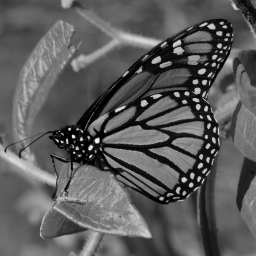

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/butterfly/Apy/00000.png')
img_Apy


Show the result restored by DDNM

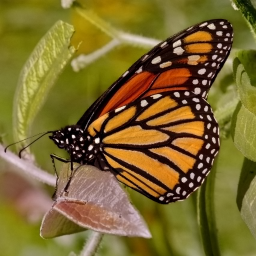

In [ ]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/butterfly/final/00000.png')
img

You can try multiple times to get diverse results!

Or, try the image super-resolution task:

In [ ]:
!python main.py --config confs/inet256.yml --path_y data/datasets/gts/inet256/323.png --class 323 --deg "sr_averagepooling" --scale 4 -i butterfly_sr

Show the input image

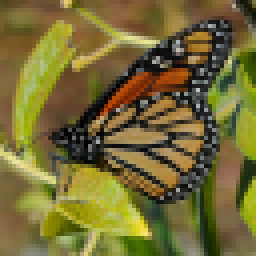

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/butterfly_sr/Apy/00000.png')
img_Apy


Show the result restored by DDNM

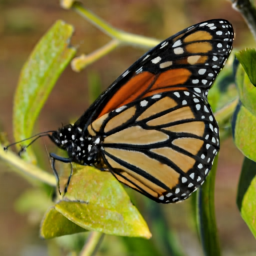

In [ ]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/butterfly_sr/final/00000.png')
img

## Orange Demo
This is an image super-resolution demo that bring a 64x256 orange image into a high-quality 256x1024 result.

Run the following command, which may take 10 minutes:

In [ ]:
cd /content/DDNM/hq_demo

In [ ]:
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/orange.png --class 950 --deg "sr_averagepooling" --scale 4 -i orange

Show the input image

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/orange/Apy/00000.png')
img_Apy


Show the result restored by DDNM

In [ ]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/orange/final/00000.png')
img

## Butterfly Demo
This is an image super-resolution demo that bring a **noisy** 99x141 butterfly image into a high-quality 396x564 result.

Run the following command, which may take 16 minutes:

In [ ]:
cd /content/DDNM/hq_demo

/content/DDNM/hq_demo


In [ ]:
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/monarch.png --class 323 --deg "sr_averagepooling" --scale 4 --sigma_y 0.5 -i monarch

Show the input image

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/monarch/Apy/00000.png')
img_Apy


Show the result restored by DDNM

In [ ]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/monarch/final/00000.png')
img

## Bear Demo
This is an image super-resolution demo that bring a 96x256 bear image into a high-quality 384x1024 result.

Run the following command, which may take 20 minutes:

In [ ]:
cd /content/DDNM/hq_demo

In [ ]:
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/bear.png --class 294 --deg "sr_averagepooling" --scale 4 -i bear

Show the input image

In [ ]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/bear/Apy/00000.png')
img_Apy


Show the result restored by DDNM

In [ ]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/bear/final/00000.png')
img

## Try other images
You may copy these commands:

```
    # orange
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/orange.png --class 950 --deg "sr_averagepooling" --scale 4 -i orange

    # brown bear
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/bear.png --class 294 --deg "sr_averagepooling" --scale 4 -i bear

    # flamingo
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/flamingo.png --class 130 --deg "sr_averagepooling" --scale 2 -i flamingo

    # kimono
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/kimono.png --class 614 --deg "sr_averagepooling" --scale 2 -i kimono

    # zebra 
!python main.py --resize_y --config confs/inet256.yml --path_y data/datasets/gts/inet256/zebra.png --class 340 --deg "sr_averagepooling" --scale 4 -i zebra
```
To speed up inference, open "/content/DDNM/hq_demo/confs/inet256.yml" and change the following values:

```
timestep_respacing: '50'
schedule_jump_params:
  t_T: 50
  jump_length: 1
  jump_n_sample: 1
```
This may speed up inference but compromise the quality. In contrast, you can sacrifice the inference time to get better quality. For example：

```
timestep_respacing: '250'
schedule_jump_params:
  t_T: 250
  jump_length: 10
  jump_n_sample: 5
```


To try different SR scales, just change "--scale".

To try your own image, just change "--path_y". 

**Important Note**:


*   You may use input image of arbitrary size
*   **You need to set the correct [class lable](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) of the input image.**
*   If your input image is already resized to the desired output size, **do not** use "--resize_y".





---




# **DDNM for face images**

## Demo

This is a demo of solving a complex degradation using DDNM, where the degradation is composed by downsampling, grayscale, and mask.

Download the pretrained model. If this command doesn't work, you can download from [this link](https://drive.google.com/uc?id=1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX) and upload the model to the "/content/DDNM/hq_demo/data/pretrained" folder.

In [7]:
%cd /content/DDNM/hq_demo/data/pretrained

/content/DDNM/hq_demo/data/pretrained


In [10]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX" && rm -rf /tmp/cookies.txt

--2023-03-12 20:22:40--  https://docs.google.com/uc?export=download&confirm=t&id=1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX
Resolving docs.google.com (docs.google.com)... 108.177.119.113, 108.177.119.100, 108.177.119.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/23kun9hq36eaik7dhv0cko2qiokv64a9/1678652550000/09741344856901479275/*/1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX?e=download&uuid=4d08accc-fcfd-4674-901f-fadacc23b362 [following]
--2023-03-12 20:22:40--  https://doc-0o-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/23kun9hq36eaik7dhv0cko2qiokv64a9/1678652550000/09741344856901479275/*/1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX?e=download&uuid=4d08accc-fcfd-4674-901f-fadacc23b362
Resolving doc-0o-a4-docs.googleusercontent.com (doc-0o-a4-docs.googleusercontent.com)... 173.194.69.1

In [ ]:
!gdown https://drive.google.com/uc?id=1norNWWGYP3EZ_o05DmoW1ryKuKMmhlCX # Trained by RePaint

Run the following code:

In [11]:
%cd /content/DDNM/hq_demo

/content/DDNM/hq_demo


In [21]:
!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/cr256.png --deg "mask_color_sr" --scale 8 -i face

Start face256
sampling...
total shifts:   0% 0/1 [00:00<?, ?it/s]
  0% 0/1210 [00:00<?, ?it/s]
  0% 1/1210 [00:02<49:49,  2.47s/it]
  0% 2/1210 [00:02<26:21,  1.31s/it]
  0% 3/1210 [00:03<18:51,  1.07it/s]
  0% 4/1210 [00:03<15:17,  1.31it/s]
  0% 5/1210 [00:04<13:24,  1.50it/s]
  0% 6/1210 [00:04<12:09,  1.65it/s]
  1% 7/1210 [00:05<11:31,  1.74it/s]
  1% 8/1210 [00:05<11:00,  1.82it/s]
  1% 9/1210 [00:06<10:48,  1.85it/s]
  1% 10/1210 [00:06<10:29,  1.90it/s]
  1% 11/1210 [00:07<10:18,  1.94it/s]
  1% 12/1210 [00:07<10:08,  1.97it/s]
  1% 13/1210 [00:08<10:02,  1.99it/s]
  1% 14/1210 [00:08<09:58,  2.00it/s]
  1% 15/1210 [00:09<09:56,  2.00it/s]
  1% 16/1210 [00:09<09:53,  2.01it/s]
  1% 17/1210 [00:10<09:50,  2.02it/s]
  1% 18/1210 [00:10<09:49,  2.02it/s]
  2% 19/1210 [00:11<09:47,  2.03it/s]
  2% 30/1210 [00:11<02:25,  8.11it/s]
  3% 31/1210 [00:12<03:07,  6.29it/s]
  3% 32/1210 [00:12<03:55,  5.01it/s]
  3% 33/1210 [00:13<04:45,  4.12it/s]
  3% 34/1210 [00:13<05:37,  3.49it/s]
  

Show the input image

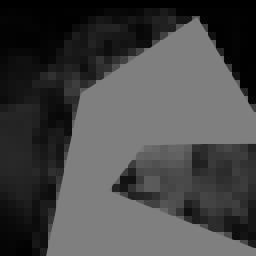

In [19]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/face/Apy/00000.png')
img_Apy


Show the result restored by DDNM

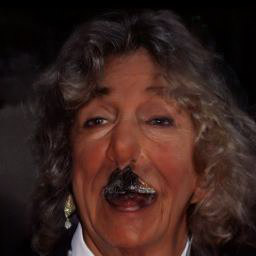

In [20]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/face/final/00000.png')
img

In [ ]:
!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/cr256.png --deg "mask_color_sr"  -i face

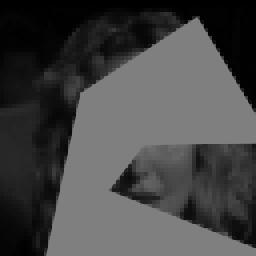

In [22]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/face/Apy/00000.png')
img_Apy

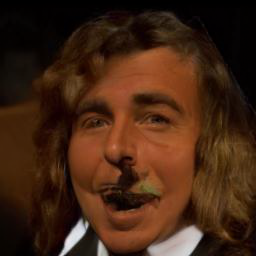

In [23]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/face/final/00000.png')
img

In [34]:
!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/cr256.png --deg "inpainting"  -i face

Start face256
sampling...
total shifts:   0% 0/1 [00:00<?, ?it/s]
  0% 0/1210 [00:00<?, ?it/s]
  0% 1/1210 [00:02<41:34,  2.06s/it]
  0% 2/1210 [00:02<22:38,  1.12s/it]
  0% 3/1210 [00:03<16:36,  1.21it/s]
  0% 4/1210 [00:03<13:47,  1.46it/s]
  0% 5/1210 [00:03<12:12,  1.65it/s]
  0% 6/1210 [00:04<11:14,  1.78it/s]
  1% 7/1210 [00:04<10:38,  1.88it/s]
  1% 8/1210 [00:05<10:16,  1.95it/s]
  1% 9/1210 [00:05<10:00,  2.00it/s]
  1% 10/1210 [00:06<09:48,  2.04it/s]
  1% 11/1210 [00:06<09:46,  2.05it/s]
  1% 12/1210 [00:07<09:38,  2.07it/s]
  1% 13/1210 [00:07<09:35,  2.08it/s]
  1% 14/1210 [00:08<09:32,  2.09it/s]
  1% 15/1210 [00:08<09:29,  2.10it/s]
  1% 16/1210 [00:09<09:28,  2.10it/s]
  1% 17/1210 [00:09<09:25,  2.11it/s]
  1% 18/1210 [00:10<09:25,  2.11it/s]
  2% 19/1210 [00:10<09:24,  2.11it/s]
  2% 30/1210 [00:11<02:19,  8.43it/s]
  3% 31/1210 [00:11<03:00,  6.52it/s]
  3% 32/1210 [00:11<03:46,  5.20it/s]
  3% 33/1210 [00:12<04:35,  4.27it/s]
  3% 34/1210 [00:12<05:24,  3.62it/s]
  

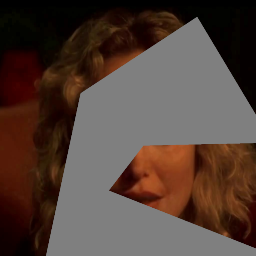

In [35]:
from PIL import Image
img_Apy = Image.open('/content/DDNM/hq_demo/results/face/Apy/00000.png')
img_Apy

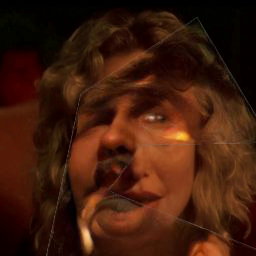

In [36]:
from PIL import Image
img = Image.open('/content/DDNM/hq_demo/results/face/final/00000.png')
img

## Try different tasks
You may copy these commands:

```
!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/girl.png --deg "sr_averagepooling" --scale 16 -i face

!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/girl.png --deg "inpainting" -i face

!python main.py --config confs/face256.yml --path_y data/datasets/gts/face/girl.png --deg "colorization" -i face
```

To try your own face image, just change "/content/DDNM/hq_demo/data/datasets/gts/face/girl.png". Make sure it is already resized to 256x256. 

To speed up inference, open "/content/DDNM/hq_demo/confs/face256.yml" and change the following values:

```
timestep_respacing: '50'
schedule_jump_params:
  t_T: 50
  jump_length: 1
  jump_n_sample: 1
```
This may speed up inference but compromise the quality. In contrast, you can sacrifice the inference time to get better quality. For example：

```
timestep_respacing: '250'
schedule_jump_params:
  t_T: 250
  jump_length: 20
  jump_n_sample: 5
```

---


